In [1]:
%%capture
%%bash
pip install imbalanced-learn

In [2]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

import imblearn

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.datasets import make_classification
from sklearn.svm import SVC

from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN, SMOTETomek


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import load_diabetes

seed = 1
np.random.seed(seed)


print(imblearn.__version__)

0.10.1


In [3]:
#read the url data
url_pima = "https://raw.githubusercontent.com/keenebrogan/smote/main/diabetes.csv"
url_brfss = "https://raw.githubusercontent.com/keenebrogan/smote/main/diabetes_binary_health_indicators_BRFSS2015.csv"
#init the data frame
df_pima = read_csv(url_pima)
# #drop the outcome column (1 or 0)
# df_pima = df_pima.drop(columns="Outcome")
#drop the first row (header Strings)
df_pima = df_pima.iloc[1: , :]
#set data to dataFrame values
data_pima = df_pima.values
#print data shape
print(f"Data shape: {df_pima.shape}")
#describe dataFrame data
df_pima.describe()
#print first row
print(df_pima.iloc[0])


sklearn = load_diabetes(as_frame = True)
df_sklearn = pd.concat([sklearn.data, sklearn.target], axis = 1)
df_sklearn = df_sklearn.drop(columns = "sex")
df_sklearn.describe()


df_brfss = read_csv(url_brfss)

Data shape: (767, 9)
Pregnancies                  1.000
Glucose                     85.000
BloodPressure               66.000
SkinThickness               29.000
Insulin                      0.000
BMI                         26.600
DiabetesPedigreeFunction     0.351
Age                         31.000
Outcome                      0.000
Name: 1, dtype: float64


In [ ]:
def smote_synth(df, target):
  X = df.drop(columns=target).values
  Y = df[target]
  Y = LabelEncoder().fit_transform(Y)

  #classes before being oversampled
  counter = Counter(Y)
  for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
  # plot the distribution
  pyplot.bar(counter.keys(), counter.values())
  pyplot.show()



  # transform the dataset
  oversample = SMOTE()
  # oversample=SMOTE(kind='regular',k_neighbors=2)
  # oversample = SMOTE(k_neighbors=3)
  X, Y = oversample.fit_resample(X, Y)
  # summarize distribution
  counter = Counter(Y)
  for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
  # plot the distribution
  pyplot.bar(counter.keys(), counter.values())
  pyplot.show()

  df_synth = pd.DataFrame(X)
  df_synth[target] = Y
  return df_synth

In [ ]:
# yPre = LabelEncoder().fit_transform(yPre)
# # summarize distribution
# counter = Counter(yPre)
# for k,v in counter.items():
# 	per = v / len(y) * 100
# 	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# # plot the distribution
# pyplot.bar(counter.keys(), counter.values())
# pyplot.show()

In [ ]:
# # label encode the target variable
# y = LabelEncoder().fit_transform(y)
# # transform the dataset
# oversample = SMOTE()
# # oversample=SMOTE(kind='regular',k_neighbors=2)
# # oversample = SMOTE(k_neighbors=3)
# X, y = oversample.fit_resample(X, y)
# # summarize distribution
# counter = Counter(y)
# for k,v in counter.items():
# 	per = v / len(y) * 100
# 	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# # plot the distribution
# pyplot.bar(counter.keys(), counter.values())
# pyplot.show()

In [ ]:
def train_test(df_real, df_synth, target):
  X = df_real.drop(columns=target).values
  X_synth = df_synth.drop(columns=target).values
  y = df_real[target]
  y_synth = df_synth[target]

  rf = RandomForestClassifier(random_state=seed)
  svc = SVC()
  X_train, y_train = X_synth, y_synth
  rf.fit(X_train, y_train)
  svc.fit(X_train, y_train)
  print("Training only synthetic:")
  print(f"RF acc: {rf.score(X,y):.3f}")
  print(f"SVC accuracy: {svc.score(X, y):.3f}")
  print(f"RF f1: {f1_score(y, rf.predict(X)):.3f}")
  print(f"SVC f1: {f1_score(y, svc.predict(X)):.3f}")

  # Train on real + synthetic
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
  X_train = np.append(X_train, X_synth, axis=0)
  y_train = np.append(y_train, y_synth, axis=0)

  rf.fit(X_train, y_train)
  svc.fit(X_train, y_train)
  print("Training on synthetic + real data...")
  print(f"RF accuracy: {rf.score(X_test, y_test):.3f}")
  print(f"SVC accuracy: {svc.score(X_test, y_test):.3f}")
  print(f"RF f1: {f1_score(y_test, rf.predict(X_test)):.3f}")
  print(f"SVC f1: {f1_score(y_test, svc.predict(X_test)):.3f}")
  print("\n\n")

Class=0, n=500 (65.189%)
Class=1, n=267 (34.811%)


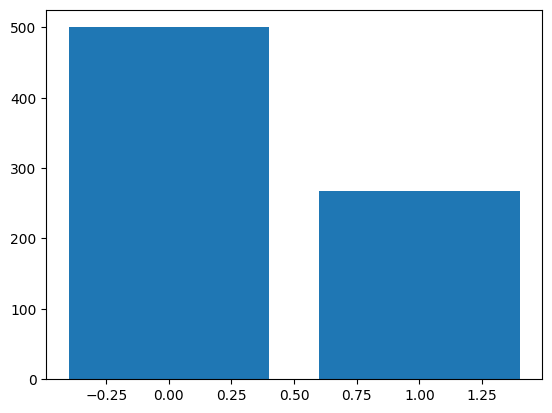

Class=0, n=500 (50.000%)
Class=1, n=500 (50.000%)


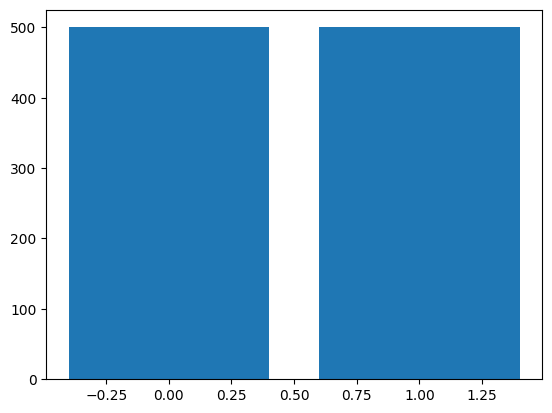

Class=0, n=218334 (86.067%)
Class=1, n=35346 (13.933%)


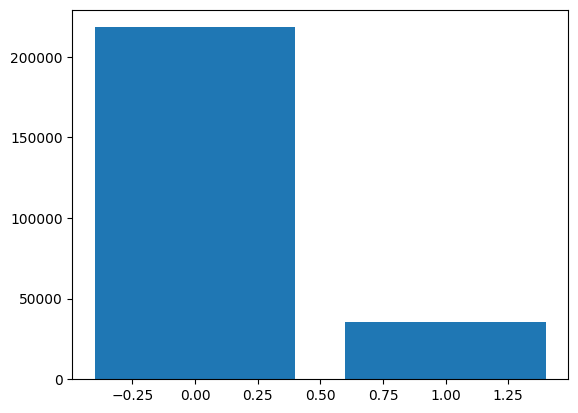

Class=0, n=218334 (50.000%)
Class=1, n=218334 (50.000%)


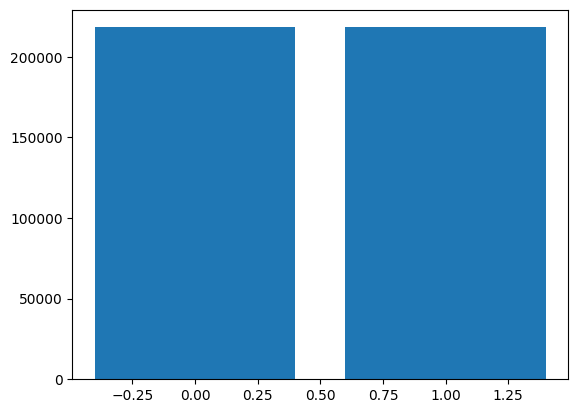

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Diabetes_binary
count,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,...,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000,436668.000000
mean,0.572984,0.534777,0.976128,29.877750,0.474624,0.056088,0.140093,0.711021,0.620477,0.797334,...,0.087215,2.838371,3.708393,5.795894,0.248465,0.454226,8.605372,4.930152,5.707945,0.500000
std,0.479765,0.480591,0.150363,7.126935,0.479004,0.212251,0.325704,0.432006,0.464333,0.381753,...,0.265793,1.085615,8.122379,10.065293,0.414884,0.478928,2.821224,0.993202,2.153042,0.500001
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.155211,0.000000,0.997049,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,0.825207,1.000000,28.968864,0.287702,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.089493,9.000000,5.000000,6.000000,0.500000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.743751,2.000000,5.420775,0.484642,1.000000,11.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [ ]:
synth_pima = smote_synth(df_pima, "Outcome")
synth_pima.describe()

# synth_sklearn = smote_synth(df_sklearn, "target")
# synth_sklearn.describe()

synth_brfss = smote_synth(df_brfss, "Diabetes_binary")
synth_brfss.describe()

In [ ]:
print("PIMA")
train_test(df_pima, synth_pima, "Outcome")

print("BRFSS")
train_test(df_brfss, synth_brfss, "Diabetes_binary")


PIMA
Training only synthetic:
RF acc: 1.000
SVC accuracy: 0.750
RF f1: 1.000
SVC f1: 0.651
Training on synthetic + real data...
RF accuracy: 1.000
SVC accuracy: 0.766
RF f1: 1.000
SVC f1: 0.609



BRFSS
